In [98]:
%pylab inline
import glob
import jvrip as jv

Populating the interactive namespace from numpy and matplotlib


<img src="files/cells.png">

In [99]:
file_list = glob.glob('data/*.txt')

In [100]:
def get_cells(file_list):
    cells =[]
    for item in file_list:
        p = jv.jvrip(item)
        item = item.split('/')[-1].split('.')[0]
        item = item.split('-')
        coords = [int(x) for x in item]
        
        p['x'] = coords[0]
        
        p['y'] = coords[1]
        
        cells.append(p)
       
        
    return cells


In [107]:
cells = get_cells(file_list)

In [102]:
def org_data(data, key):
    fdata = []
    for cell in data:
        fdata.append([cell.get('x'), cell.get('y'), cell.get(key)])
        
    return transpose(fdata)


In [103]:
data = org_data(cells, 'Eff')

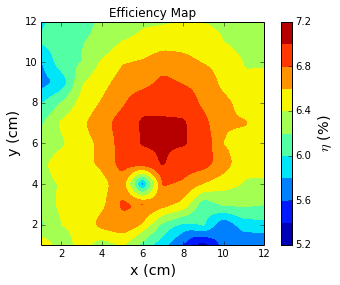

In [104]:
x = data[0]
y = data[1]
z = data[2]

xi = linspace(min(x), max(x), 100)
yi = linspace(min(y), max(y), 100)

fig = figure()
zi = griddata(x, y, z, xi, yi)
ax = fig.add_subplot(111)
ax.set_aspect('equal')
s = ax.contourf(xi, yi, zi, 10)
c = colorbar(s)
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
c.set_label('$\eta$ (%)')
ax.set_title('Efficiency Map')


In [105]:
len(zi)

100

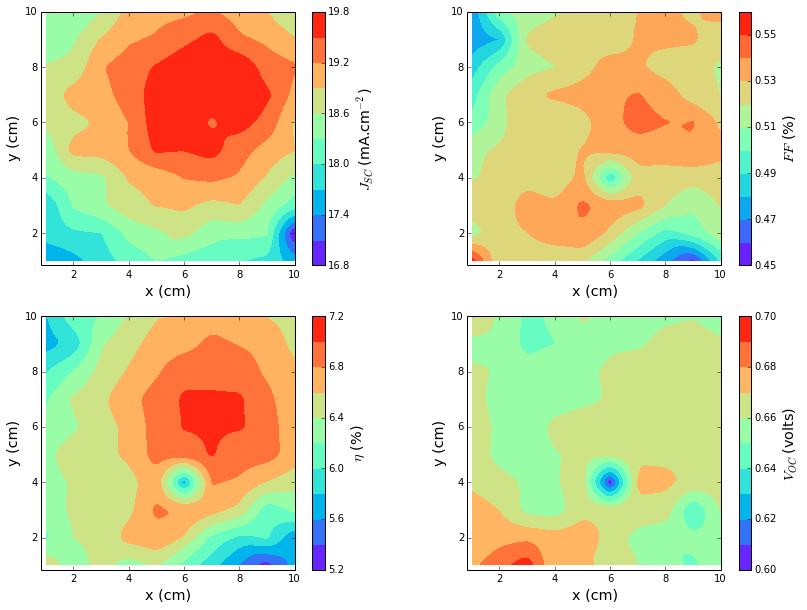

In [106]:
f, axes = subplots(2,2,figsize=(14, 10))

param = {'Eff': '$\eta$ (%)',
         'voc': '$V_{OC}$ (volts)',
         'jsc': '$J_{SC}$ (mA.cm$^{-2}$)',
         'FF': '$FF$ (%)'}

flat = axes.ravel()


for ax, p in zip(flat, param):
    
    data = org_data(cells, p)
    x = data[0]
    y = data[1]
    z = data[2]
    scale = (10/12.0)
    xi = (linspace(min(x), max(x), 100)*scale)
    yi = (linspace(min(y), max(y), 100)*scale)

    zi = griddata(x, y, z, xi, yi)
    
    ax.set_aspect('equal')
    ax.set_xlabel('x (cm)')
    ax.set_ylabel('y (cm)')
    s = ax.contourf(xi, yi, zi, 10, cmap='rainbow')
    cb = colorbar(s,ax=ax)
    cb.set_label(param.get(p))
    
    
